In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
pd.set_option('display.max_columns', None)

In [35]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
data.head(10)

,dim_run_date,dim_facility_id,product_volume,number_of_blood_product_units_processed,blood_product,dim_custom_data_id,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_data_configuration_id,configuration_name,protocol_name,protocol_adpt_name,configuration_status,device_id,device_software_version,device_language_name,donation_id,donation_status,bucket_number,unit_number,unit_number_lifetime_status,operator_id,welding_status,run_datetime,alarm_id,message,time_stamp,exception_type,exception_state,run_id,run_number,barcode_skip_status,start_datetime
0,2015-01-19,290D989C-1127-EB11-80C7-005056AF16E2,94,1,Platelet_Yield_Index,16F27CC6-500B-4EDD-AA8D-A0A7CA83DC78,1,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,78E3117C-12ED-4623-8EE9-003081635FDA,1.05.002.00002,English,B46F742D-6B56-479B-9981-3CC8CFC7F38F,Complete,3.0,2377851,Complete,AMH,Weld Successful,2015-01-19 00:49:23,NaN,NaN,NaT,NaN,NaN,7A6B937A-2C90-481F-9A2E-F6415A7E5AAF,1577.0,None Skipped,2015-01-19 00:49:23
1,2015-01-19,290D989C-1127-EB11-80C7-005056AF16E2,64,1,Platelet_Volume,16F27CC6-500B-4EDD-AA8D-A0A7CA83DC78,1,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,78E3117C-12ED-4623-8EE9-003081635FDA,1.05.002.00002,English,B46F742D-6B56-479B-9981-3CC8CFC7F38F,Complete,3.0,2377851,Complete,AMH,Weld Successful,2015-01-19 00:49:23,NaN,NaN,NaT,NaN,NaN,7A6B937A-2C90-481F-9A2E-F6415A7E5AAF,1577.0,None Skipped,2015-01-19 00:49:23
2,2015-01-19,290D989C-1127-EB11-80C7-005056AF16E2,9,1,Leukocyte_Volume,16F27CC6-500B-4EDD-AA8D-A0A7CA83DC78,1,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,78E3117C-12ED-4623-8EE9-003081635FDA,1.05.002.00002,English,B46F742D-6B56-479B-9981-3CC8CFC7F38F,Complete,3.0,2377851,Complete,AMH,Weld Successful,2015-01-19 00:49:23,NaN,NaN,NaT,NaN,NaN,7A6B937A-2C90-481F-9A2E-F6415A7E5AAF,1577.0,None Skipped,2015-01-19 00:49:23
3,2015-01-19,290D989C-1127-EB11-80C7-005056AF16E2,180,1,Plasma_Volume,16F27CC6-500B-4EDD-AA8D-A0A7CA83DC78,1,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,78E3117C-12ED-4623-8EE9-003081635FDA,1.05.002.00002,English,B46F742D-6B56-479B-9981-3CC8CFC7F38F,Complete,3.0,2377851,Complete,AMH,Weld Successful,2015-01-19 00:49:23,NaN,NaN,NaT,NaN,NaN,7A6B937A-2C90-481F-9A2E-F6415A7E5AAF,1577.0,None Skipped,2015-01-19 00:49:23
4,2015-01-19,290D989C-1127-EB11-80C7-005056AF16E2,68,1,Platelet_Volume,91A0D81C-8D61-47BF-9883-E1D97C89113C,1,1,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,E089F

In [4]:
data.loc[data['number_of_exception_alarms'] == 1]

,dim_run_date,dim_facility_id,product_volume,number_of_blood_product_units_processed,blood_product,dim_custom_data_id,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_data_configuration_id,configuration_name,protocol_name,protocol_adpt_name,configuration_status,device_id,device_software_version,device_language_name,donation_id,donation_status,bucket_number,unit_number,unit_number_lifetime_status,operator_id,welding_status,run_datetime,alarm_id,message,time_stamp,exception_type,exception_state,run_id,run_number,barcode_skip_status,start_datetime
64,2015-01-27,290D989C-1127-EB11-80C7-005056AF16E2,166,1,Plasma_Volume,2BA49E9E-8517-458A-9752-826606A792FF,1,1,0,0,0,0,0,0,0,0,0,1,74.186203,0.233333,4.663833,1.983333,21.036516,18.450001,2.953983,1,0,9,0,19.875000,22.129999,22.562000,19.837999,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,311FF909-A47F-4EDF-A340-04DD8BFF90A4,1.05.002.00002,English,BA1C7DFC-2E19-4930-BB93-8D4959B4529D,Complete,3.0,2378402,Complete,AMH,Weld Successful,2015-01-27 17:56:10,NaN,NaN,NaT,NaN,NaN,CD24B0E2-DC3A-4286-8923-550FFA6A9C6E,1738.0,None Skipped,2015-01-27 17:56:10
65,2015-01-27,290D989C-1127-EB11-80C7-005056AF16E2,73,1,Platelet_Volume,2BA49E9E-8517-458A-9752-826606A792FF,1,1,0,0,0,0,0,0,0,0,0,1,74.186203,0.233333,4.663833,1.983333,21.036516,18.450001,2.953983,1,0,9,0,19.875000,22.129999,22.562000,19.837999,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,311FF909-A47F-4EDF-A340-04DD8BFF90A4,1.05.002.00002,English,BA1C7DFC-2E19-4930-BB93-8D4959B4529D,Complete,3.0,2378402,Complete,AMH,Weld Successful,2015-01-27 17:56:10,NaN,NaN,NaT,NaN,NaN,CD24B0E2-DC3A-4286-8923-550FFA6A9C6E,1738.0,None Skipped,2015-01-27 17:56:10
66,2015-01-27,290D989C-1127-EB11-80C7-005056AF16E2,7,1,Leukocyte_Volume,2BA49E9E-8517-458A-9752-826606A792FF,1,1,0,0,0,0,0,0,0,0,0,1,74.186203,0.233333,4.663833,1.983333,21.036516,18.450001,2.953983,1,0,9,0,19.875000,22.129999,22.562000,19.837999,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,311FF909-A47F-4EDF-A340-04DD8BFF90A4,1.05.002.00002,English,BA1C7DFC-2E19-4930-BB93-8D4959B4529D,Complete,3.0,2378402,Complete,AMH,Weld Successful,2015-01-27 17:56:10,NaN,NaN,NaT,NaN,NaN,CD24B0E2-DC3A-4286-8923-550FFA6A9C6E,1738.0,None Skipped,2015-01-27 17:56:10
67,2015-01-27,290D989C-1127-EB11-80C7-005056AF16E2,117,1,Platelet_Yield_Index,2BA49E9E-8517-458A-9752-826606A792FF,1,1,0,0,0,0,0,0,0,0,0,1,74.186203,0.233333,4.663833,1.983333,21.036516,18.450001,2.953983,1,0,9,0,19.875000,22.129999,22.562000,19.837999,E089FB6D-DD6B-4A79-83B4-B3DD184B65BC,3C Fresh,3C_Fresh_v104_19June14,v104_2014_03_05_13_35_01,Routine,311FF909-A47F-4EDF-A340-04DD8BFF90A4,1.05.002.00002,English,BA1C7DFC-2E19-4930-BB93-8D4959B4529D,Complete,3.0,2378402,Complete,AMH,Weld Successful,2015-01-27 17:56:10,NaN,NaN,NaT,NaN,NaN,CD24B0E2-DC3A-4286-8923-550FFA6A9C6E,1738.0,None Skipped,2015-01-27 17:56:10
68,2015-01-27,290D989C-1127-EB11-80C7-005056AF16E2,71,1,Platelet_Volume,18653EA2-E861-48F1-9F7E-DD2D2D1F4C5D,1,1,0,0,0,0,0,0,0,0,0,1,74.186203,0.233333,4.663833,1.983333,21.036516,18.450001,2.953983,1,0,9,0,19.875000,22.129999,22.562000,19.837999,E089FB6D-DD6B-4A79-83B4-B3DD184B65

In [5]:
data['number_of_alerts'].describe()

count    2.173228e+07
mean     3.308385e-01
std      8.385885e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.700000e+01
Name: number_of_alerts, dtype: float64

In [6]:
data['number_of_donation_alarms'].describe()

count    2.173228e+07
mean     7.253283e-02
std      4.672640e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.200000e+01
Name: number_of_donation_alarms, dtype: float64

In [7]:
data['number_of_exception_alarms'].describe()

count    7442102.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: number_of_exception_alarms, dtype: float64

In [8]:
data['number_of_temp_out_of_range_exceptions'].describe()

count    7.442102e+06
mean     1.668601e-02
std      1.280921e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: number_of_temp_out_of_range_exceptions, dtype: float64

In [9]:
data['alarm_id'].describe()

count     1331243
unique        225
top          1064
freq       137324
Name: alarm_id, dtype: object

In [10]:
# calculate basic statistics col1
print(data['number_of_alerts'].sum())
print(data['number_of_alerts'].mean())
print(data['number_of_alerts'].median())
print(data['number_of_alerts'].std())
print(data['number_of_alerts'].describe())
# calculate correlation and covariance of dataframe
#tmp1=data.cov()
#tmp2=data.corr()

#print("correlation:\n " + str(tmp1))
#print("\n")
#print("covariance:\n " + str(tmp2))

7189876
0.33083848895035606
0.0
0.838588508313418
count    2.173228e+07
mean     3.308385e-01
std      8.385885e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.700000e+01
Name: number_of_alerts, dtype: float64


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [38]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


In [53]:
train_data, test_data = train_test_split(tmp_data, test_size=0.5)
model = LogisticRegression(solver='liblinear', random_state=0).fit(train_data['run_duration_minutes'].values.reshape(-1,1).astype('int'), train_data['number_of_alerts'].astype('int'))

In [54]:
print("Accuracy =", model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int')))
test_data.head()

Accuracy = 0.8073091010411153


,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
4733491,11,1,1,1,0,0,0,0,0,0,0,0,0,0,27.850000,3.216667,4.250000,0.150000,0.450000,19.750000,2.200000,1,0,9,0,20.923000,21.731001,22.403000,20.613001,15759.0
11999443,235,1,1,1,0,0,0,0,0,0,0,0,0,0,65.099998,20.150000,6.550000,0.866667,17.600000,19.183332,4.566667,1,0,13,0,20.947001,21.445999,22.396000,20.632000,4337.0
3842475,203,1,1,1,0,0,0,0,0,0,0,0,0,1,37.500000,2.433333,15.433333,0.350000,2.116667,16.616667,3.050000,1,0,9,0,21.056999,22.120001,22.573999,20.561001,7860.0
20073057,12,1,1,1,0,0,1,0,0,0,0,0,0,1,161.383331,40.633335,3.216667,2.466667,85.500000,20.400000,1.900000,1,0,9,0,21.643000,21.471001,22.672001,20.900000,28180.0
6759116,12,1,1,1,0,0,0,0,0,0,0,0,0,0,29.049999,1.950000,6.116667,0.650000,0.300000,19.066668,1.633333,1,0,21,0,22.450001,20.409000,22.492001,20.407000,1437.0


In [55]:
train_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
4647128,40,1,1,1,0,0,0,0,0,0,0,0,0,1,31.816668,11.200000,2.933333,1.366667,0.066667,15.916667,1.516667,1,0,9,0,21.749001,21.511000,22.848000,20.646,6026.0
2158689,60,1,1,0,0,0,0,0,0,0,0,0,0,0,31.466667,1.983333,4.883333,1.300000,0.916667,20.500000,3.233333,1,0,4,0,21.929001,21.813000,23.726000,21.813,5950.0
1714255,298,1,1,1,0,0,0,1,0,0,0,0,0,1,16.916666,0.216667,2.766667,0.433333,0.083333,12.633333,1.616667,1,0,12,0,22.018999,21.441000,23.004999,21.254,7205.0
21231845,80,1,1,1,0,0,0,0,0,0,0,0,0,0,33.000000,6.800000,5.850000,0.633333,1.000000,18.516666,4.200000,1,2,9,0,22.292000,20.865000,23.108000,20.865,163.0
878931,55,1,1,1,0,0,1,0,0,0,0,0,0,1,43.766666,2.500000,9.816667,7.350000,6.250000,17.766666,5.983333,1,0,8,0,21.646000,21.540001,22.861000,20.850,3532.0


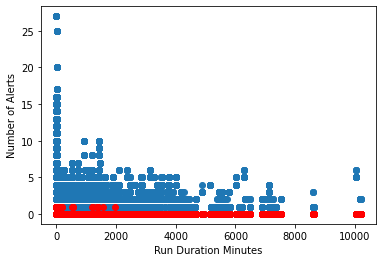

In [56]:
y_pred_sk = model.predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))
                          
plt.clf()
plt.scatter(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))
plt.scatter(test_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), y_pred_sk, c="red")
plt.xlabel("Run Duration Minutes")
plt.ylabel("Number of Alerts")
plt.show()

In [ ]:
new_data = data._get_numeric_data()
new_data.head(10)

In [ ]:

model = LogisticRegression(solver='liblinear', random_state=0).fit(new_data.values.reshape(-1,1).astype('int'), new_data.astype('int'))